# <h2> Project :  Part 2 </h2>   
<h2>Ala Bouslama  </h2>                                            


In [ ]:
import pyspark


In [2]:
import pandas as pd

In [3]:
from pyspark import SparkContext


In [4]:
import seaborn as sb

In [5]:
import re

In [6]:
from matplotlib import pyplot as plt
import seaborn as sb



In [7]:
sc = pyspark.SparkContext(appName="trump_tweets_text_date")

In [8]:
rdd_tweets = sc.textFile('trump_tweets_text_date.txt')
rdd_tweets.take(10)


['White House news conference today at 5:30 P.M. Eastern. Thank you!,04-15-2020 20:49:31',
 'We are having very productive calls with the leaders of every sector of the economy who are all-in on getting America back to work and soon. More to come! #MAGA,04-15-2020 19:02:47',
 'My condolences to the Steinbrenner family and the entire @Yankees Organization on the passing of Hank Steinbrenner. He was a friend and will be missed greatly by all! https://t.co/nHsO7Wy0oM,04-15-2020 15:48:05',
 '#ThanksForDelivering @UPS! https://t.co/4Sis7Tme17,04-15-2020 15:39:58',
 'RT @USNavy: Hard at work in #NYC.#USNavy Sailors provide care for trauma emergency and urgent care patients without regard to their #CO…,04-15-2020 15:39:13',
 'Our GREAT Senator from South Carolina @SenatorTimScott just released a fantastic new book “OPPORTUNITY KNOCKS: How Hard Work Community and Business Can Improve Lives and End Poverty.” Get your copy today! https://t.co/fmSYMijfgm,04-15-2020 15:37:20',
 'RT @GOPLeader: RT 

In [9]:
# Total Number of lines
rdd_tweets.count()

28972

In [10]:
# Retweets 
Retweets = rdd_tweets.filter(lambda line : line.startswith('RT'))

In [11]:
Retweets.count()

5771

In [13]:
# here we filter Tweets
Tweets = rdd_tweets.filter ( lambda line : not line.startswith('RT'))

In [14]:
Tweets.count()

23201

In [18]:
# evolution of retweets per year
Evolution_Retweets_per_year = Retweets.filter(lambda line : line.startswith('RT')) \
                             .map(lambda line: (line.split(',')[-1]).split(' ') [0] [6:12]) \
                             .map(lambda year : (year, 1)) \
                             .reduceByKey(lambda a,b : a + b) \
                             .sortBy(lambda tuple: tuple[1], ascending=False)
                             

In [16]:
Evolution_Retweets_per_year.take(5)

[('2019', 3013), ('2020', 1796), ('2018', 464), ('2017', 310), ('2016', 188)]

<b> In 2019 , we have the highest number of tweets while in 2016 we have the lowest number

In [19]:
# evolution of tweets per year

Evolution_tweets_per_year = Tweets.filter(lambda line : not line.startswith('RT')) \
                             .map(lambda line: (line.split(',')[-1]).split(' ') [0] [6:12]) \
                             .map(lambda year : (year, 1)) \
                             .reduceByKey(lambda a,b : a + b) \
                             .sortBy(lambda tuple: tuple[1], ascending=False)

In [20]:
Evolution_tweets_per_year.take(5)

[('2015', 7536),
 ('2019', 4805),
 ('2016', 4037),
 ('2018', 3104),
 ('2017', 2292)]

<b> In 2015 , we have the highest number of tweets while in 2017 we have the lowest number

In [22]:
#Here we used many seperator to split the data into words
import re

def split_with_multiple_separator(string_value):
    return re.split(' |, \[|\]', string_value.strip())
split_with_multiple_separator(rdd_tweets.take(1)[0])

['White',
 'House',
 'news',
 'conference',
 'today',
 'at',
 '5:30',
 'P.M.',
 'Eastern.',
 'Thank',
 'you!,04-15-2020',
 '20:49:31']

In [26]:
#Removing espace words
rdd_tweets_words = rdd_tweets.flatMap(split_with_multiple_separator).filter(lambda word: word!='')
rdd_tweets_words.take(10)

['White',
 'House',
 'news',
 'conference',
 'today',
 'at',
 '5:30',
 'P.M.',
 'Eastern.',
 'Thank']

# Top Hashtag 


In [29]:
hashtags = rdd_tweets_words.filter(lambda w: '#' in w).map(lambda hashtag : (hashtag, 1)) \
                             .reduceByKey(lambda a,b : a + b) \
                             .sortBy(lambda tuple: tuple[1], ascending=False)
hashtags.take(10)

[('#Trump2016', 377),
 ('#MakeAmericaGreatAgain', 250),
 ('#MAGA', 188),
 ('#CelebApprentice', 75),
 ('#KAG2020', 62),
 ('#AmericaFirst', 58),
 ('#CelebrityApprentice', 56),
 ('#VoteTrump', 54),
 ('#DrainTheSwamp', 50),
 ('#1', 47)]

In [30]:
top_10_hashtags = hashtags.take(10)


In [31]:
def ploting ( top_10_hashtags):
    list_1 = [(t[0], t[1]) for t in top_10_hashtags]
    
    pd_df = pd.DataFrame({
     'hashtags': [ t[0] for t in list_1 ],
     'Count': [ t[1] for t in list_1 ],
    }).sort_values('Count', ascending=False)
    
    
    plt.figure( figsize = (12, 8) )
    chart=sb.barplot(data=pd_df, x='hashtags', y='Count', order=pd_df['hashtags'])
    chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=80, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
    )

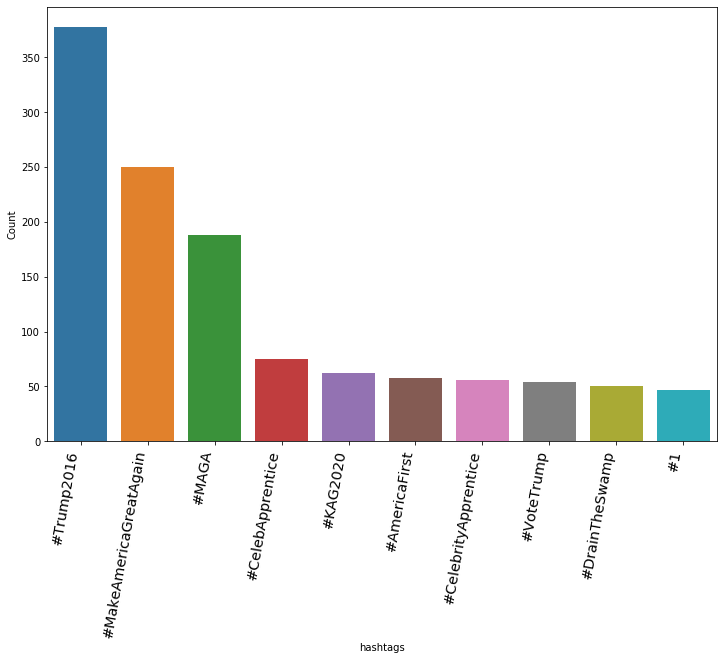

In [32]:
ploting(top_10_hashtags)

<b> Trump2016 is the most popular hashtag with 377 and #MakeAmericaGreatAgain with 250 

# Top references

In [34]:
# Top references
References = rdd_tweets_words.filter(lambda w: '@' in w).map(lambda Reference : (Reference, 1)) \
                             .reduceByKey(lambda a,b : a + b) \
                             .sortBy(lambda tuple: tuple[1], ascending=False)
References.take(10)

[('@realDonaldTrump', 3857),
 ('@realDonaldTrump:', 607),
 ('@FoxNews', 415),
 ('@WhiteHouse:', 377),
 ('@foxandfriends', 276),
 ('@CNN', 250),
 ('@ApprenticeNBC', 173),
 ('@GOPChairwoman:', 163),
 ('@nytimes', 150),
 ('@megynkelly', 131)]

In [35]:
top_10_references = References.take(10)

In [36]:
def ploting ( top_10_references):
    list_1 = [(t[0], t[1]) for t in top_10_references]
    
    pd_df = pd.DataFrame({
     'References': [ t[0] for t in list_1 ],
     'Count': [ t[1] for t in list_1 ],
    }).sort_values('Count', ascending=False)
    
    
    plt.figure( figsize = (12, 8) )
    chart=sb.barplot(data=pd_df, x='References', y='Count', order=pd_df['References'])
    chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=80, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
    

    )
    

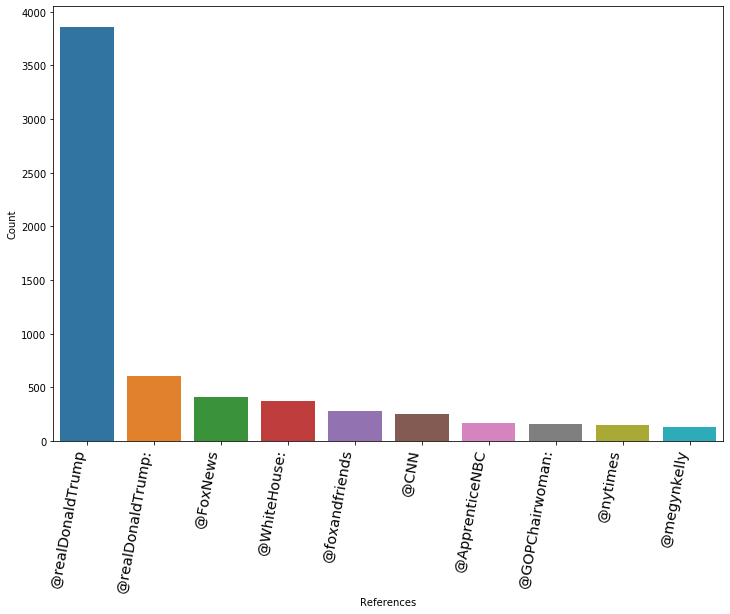

In [37]:
ploting ( top_10_references)

<b> The two highest references are @realDonaldTrump' with 3857) and '@realDonaldTrump:' with 607

In [38]:
#  we read the positive words

rdd_positive_words = sc.textFile('positive-words.txt')

rdd_positive_words.take(5)


['a+', 'abound', 'abounds', 'abundance', 'abundant']

In [39]:
rdd_positive_words_kv = rdd_positive_words.map(lambda word: (word, 1))

rdd_positive_words_kv.take(5)

[('a+', 1), ('abound', 1), ('abounds', 1), ('abundance', 1), ('abundant', 1)]

In [40]:
rdd_tweets_words_kv = rdd_tweets_words.map(lambda word: (word, 1))

rdd_tweets_words_kv.take(10)

[('White', 1),
 ('House', 1),
 ('news', 1),
 ('conference', 1),
 ('today', 1),
 ('at', 1),
 ('5:30', 1),
 ('P.M.', 1),
 ('Eastern.', 1),
 ('Thank', 1)]

In [41]:
# Joining our rdd tweets word with the rdd of + words

rdd_positive_words_tweets_kv = rdd_tweets_words_kv.join(rdd_positive_words_kv)

rdd_positive_words_tweets_kv.take(5)

[('work', (1, 1)),
 ('work', (1, 1)),
 ('work', (1, 1)),
 ('work', (1, 1)),
 ('work', (1, 1))]

In [42]:
# use  mapValues to assign a default count of 1 for each positive word

rdd_positive_words_tweets_kv = rdd_positive_words_tweets_kv.mapValues(lambda tuple: 1)

rdd_positive_words_tweets_kv.take(5)

[('work', 1), ('work', 1), ('work', 1), ('work', 1), ('work', 1)]

In [44]:
# summing number of occurence of each positive word in our file 

rdd_positive_words_tweets_count_kv = rdd_positive_words_tweets_kv.reduceByKey(lambda x,y : x+y)


rdd_positive_words_tweets_count_kv.take(5)

[('work', 400),
 ('favorite', 51),
 ('good', 678),
 ('wonderful', 304),
 ('like', 942)]

In [45]:
# rdd_positive_words_product_count_kv_ordered should contain the previous RDD in descending order based on the count

rdd_positive_words_tweets_count_kv_ordered = rdd_positive_words_tweets_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_positives_opinion = rdd_positive_words_tweets_count_kv_ordered.take(25)

list_top_positives_opinion

[('great', 2404),
 ('like', 942),
 ('good', 678),
 ('love', 411),
 ('work', 400),
 ('best', 391),
 ('win', 384),
 ('right', 364),
 ('better', 352),
 ('support', 348),
 ('strong', 312),
 ('wonderful', 304),
 ('honor', 302),
 ('well', 276),
 ('thank', 227),
 ('important', 211),
 ('amazing', 203),
 ('incredible', 197),
 ('protect', 187),
 ('won', 181),
 ('nice', 176),
 ('ready', 171),
 ('tough', 169),
 ('proud', 162),
 ('beautiful', 154)]

In [46]:
def ploting ( list_top_positives_opinion):
    list_1 = [(t[0], t[1]) for t in list_top_positives_opinion]
    
    pd_df = pd.DataFrame({
     'Positive': [ t[0] for t in list_1 ],
     'Count': [ t[1] for t in list_1 ],
    }).sort_values('Count', ascending=False)
    
    
    plt.figure( figsize = (12, 8) )
    chart=sb.barplot(data=pd_df, x='Positive', y='Count', order=pd_df['Positive'])
    chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=80, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
    )

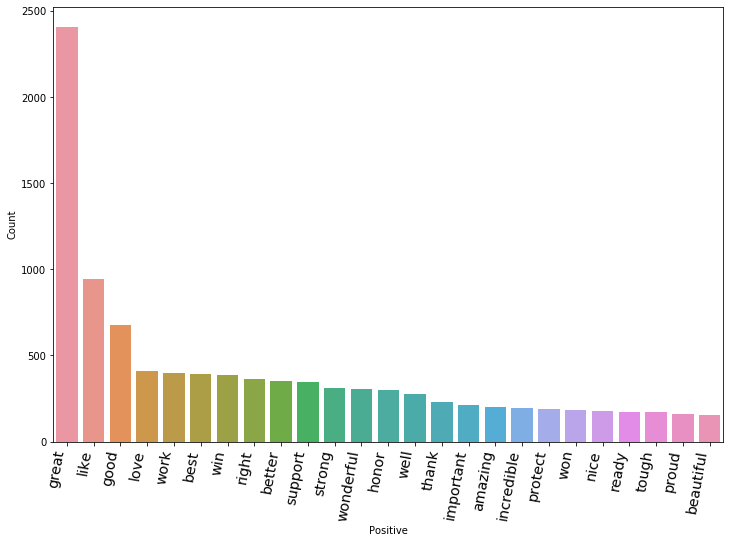

In [47]:
ploting ( list_top_positives_opinion)

<b> the top positive words in our file are 'great' with 2404,
 'like' with  942
 'good' with 678,
 'love' with 411, and 
 'work',  with 400

In [48]:
# Negative words 
rdd_negative_words = sc.textFile('negative-words.txt')

rdd_negative_words.take(5)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable']

In [50]:
# initialize an rdd with key/value in order to count after 

rdd_negative_words_kv = rdd_negative_words.map(lambda word: (word, 1))

rdd_negative_words_kv.take(5)

[('2-faced', 1),
 ('2-faces', 1),
 ('abnormal', 1),
 ('abolish', 1),
 ('abominable', 1)]

In [51]:
# Joining our rdd tweets word with the rdd of - words
rdd_negative_words_tweets_kv = rdd_tweets_words_kv.join(rdd_negative_words_kv)

rdd_negative_words_tweets_kv.take(5)

[('emergency', (1, 1)),
 ('emergency', (1, 1)),
 ('emergency', (1, 1)),
 ('emergency', (1, 1)),
 ('emergency', (1, 1))]

In [53]:
#  mapValues transformation to put words in tuples with assigning  1 

rdd_negative_words_tweets_kv = rdd_negative_words_tweets_kv.mapValues(lambda tuple:1)

rdd_negative_words_tweets_kv.take(5)

[('emergency', 1),
 ('emergency', 1),
 ('emergency', 1),
 ('emergency', 1),
 ('emergency', 1)]

In [55]:
# Count each negative word

rdd_negative_words_tweets_count_kv = rdd_negative_words_tweets_kv.reduceByKey(lambda x,y: x+y)

rdd_negative_words_tweets_count_kv.take(5)

[('emergency', 22),
 ('infections', 1),
 ('confusion', 3),
 ('worse', 59),
 ('lost', 186)]

In [57]:
# tOP NEGATIVE WORDS

rdd_negative_words_tweets_count_kv_ordered = rdd_negative_words_tweets_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_negatives_opinion = rdd_negative_words_tweets_count_kv_ordered.take(25)

list_top_negatives_opinion

[('bad', 451),
 ('hard', 373),
 ('illegal', 245),
 ('lost', 186),
 ('crime', 170),
 ('terrible', 168),
 ('phony', 158),
 ('wrong', 138),
 ('failed', 134),
 ('attack', 131),
 ('dishonest', 130),
 ('corrupt', 130),
 ('badly', 128),
 ('worst', 126),
 ('weak', 121),
 ('failing', 114),
 ('horrible', 108),
 ('false', 104),
 ('killed', 97),
 ('problem', 94),
 ('dangerous', 88),
 ('ridiculous', 85),
 ('losing', 78),
 ('lies', 77),
 ('hate', 76)]

<b> Bad and har are the most occured negative words in our file

In [58]:
# the utility function plot_opinion plots a bar chart presenting top positives and top negatives words
# the parameters are list of tuples containing counts from positives and negatives words

from matplotlib import pyplot as plt
import seaborn as sb

import pandas as pd

def plot_opinion(list_positives, list_negatives):
    
    list_1 = [(t[0], t[1], 'positive') for t in list_positives]
    list_2 = [(t[0], t[1], 'negative') for t in list_negatives]
    
     
    list_1.extend(list_2)
    
    
    pd_df = pd.DataFrame({
     'Opinion': [ t[0] for t in list_1 ],
     'Count': [ t[1] for t in list_1 ],
     'polarity': [ t[2] for t in list_1 ]
    }).sort_values('Count', ascending=False)
    
    pd_df['color'] = pd_df.polarity.apply(lambda polarity: 'green' if polarity=='positive' else 'red')
    
    plt.figure( figsize = (12, 8) )
    chart=sb.barplot(data=pd_df, x='Opinion', y='Count', hue='polarity', palette=["green", "red"], order=pd_df['Opinion'])
    chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=80, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
    )
    
    for tick, color in zip(chart.get_xticklabels(), pd_df['color']): 
        tick.set_color(color)
    
    plt.show()

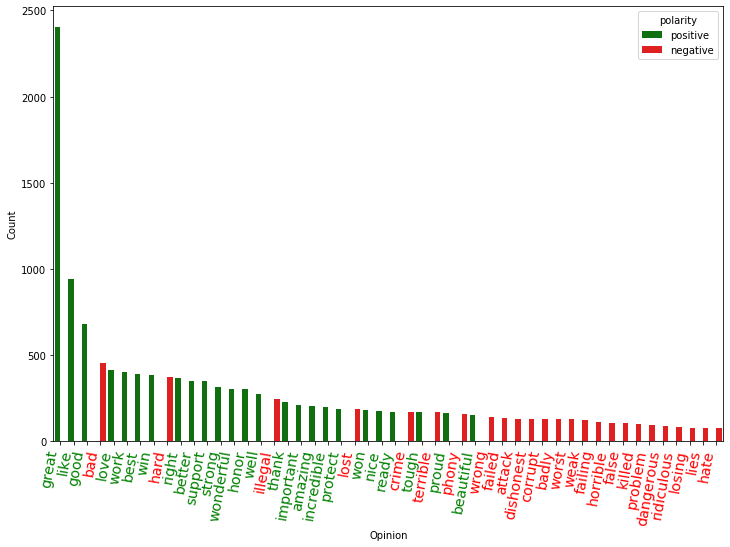

In [59]:
# call the plot_opinion function to plot our product reviews top positives and negatives opinions

plot_opinion(list_top_positives_opinion, list_top_negatives_opinion)

<b> we have the thre top words are positive than we have a negative word , and  4 other positive 
    == > the polarity is More positive 

In [61]:
# we read our stop words

rdd_stop_words = sc.textFile('stop-words.txt')

rdd_stop_words.take(5)

['a', 'about', 'above', 'across', 'after']

In [65]:
contextual_words = rdd_tweets_words.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)

contextual_words.take(10)

['family',
 'family',
 'family',
 'family',
 'family',
 'family',
 'family',
 'family',
 'family',
 'family']

In [63]:
 contextual_words_cleaned= rdd_tweets.flatMap(split_with_multiple_separator).filter(lambda word: word!='RT').filter(lambda w: '@' not in w)


In [69]:
# use multiple transformations for counting each contextual word in the product review file, sorted in ascending order based 
# on the count

contextual_words_count_ordered = contextual_words_cleaned.map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

list_top_contextual_words = contextual_words_count_ordered.take(10)  

list_top_contextual_words

[('the', 23373),
 ('to', 14870),
 ('and', 12129),
 ('of', 10603),
 ('a', 9324),
 ('is', 8474),
 ('in', 8242),
 ('for', 6900),
 ('I', 5836),
 ('on', 5416)]

In [60]:
# the utility function plot_contextual_words plots a bar chart presenting top contextual words
# the parameter are list of tuples containing counts from contextual words

def plot_contextual_words(list_contextual_words):
    
    pd_df = pd.DataFrame({
        'Word':  [ t[0] for t in list_contextual_words ],
        'Count': [ t[1] for t in list_contextual_words ]
    }).sort_values('Count', ascending=False)
    
    plt.figure( figsize = (15, 8) )
    
    chart=sb.barplot(data=pd_df, x='Word', y='Count', order=pd_df['Word'], color='blue')
    
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=80, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large',
        )
    
    plt.show()

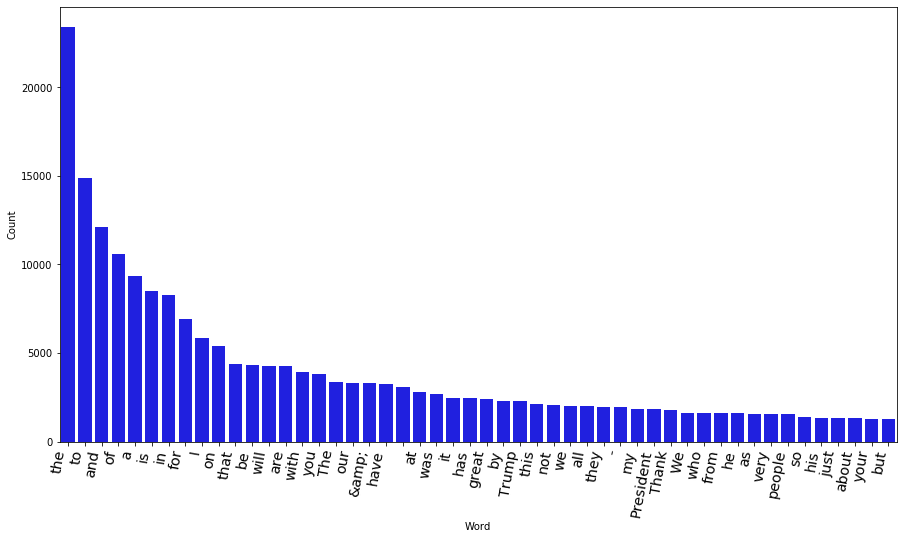

In [61]:
plot_contextual_words(list_top_contextual_words)

The and to are the most occured contectuel words in our file 

In [57]:
# Compute the global sentiment score: the total count of positive words (e.g. use rdd_positive_words_product_count_kv) minus
# the total count of negative words (e.g. use rdd_negative_words_product_count_kv)


sentiment_score = rdd_positive_words_tweets_count_kv.map(lambda tuple: tuple[1]).sum()\
                  - rdd_negative_words_tweets_count_kv.map(lambda tuple: tuple[1]).sum()

print('The sentiment score is : ',sentiment_score)

The sentiment score is :  5774


<b> The sentiment score is positive 5774 

# Thank you . 